# Convolutional Neural Network

"In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. CNNs take a different approach towards regularization: they take advantage of the hierarchical pattern in data and assemble more complex patterns using smaller and simpler patterns. Therefore, on the scale of connectedness and complexity, CNNs are on the lower extreme." [(Wikipedia)](https://en.wikipedia.org/wiki/Convolutional_neural_network)


**Data:** Keras MNIST Fashion data


In [1]:
# importing libraries and packages
import numpy as np
import matplotlib.pyplot as plt
import warnings
import timeit, time
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
warnings.filterwarnings('ignore')

In [2]:
# checking tensorflow version
tf.__version__, tf.keras.__version__

('2.1.0', '2.2.4-tf')

## Loading Data

In [3]:
# loading data from keras
data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [4]:
# creating a list of the class names 
class_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle-boot']

## Exploring Data

In [5]:
# checking shape of the train sets
print("Size: Train images {}, Train labels {}".format(train_images.shape, train_labels.shape))

# saving items in training dataset
train_rows = train_images.shape[0]

Size: Train images (60000, 28, 28), Train labels (60000,)


In [6]:
# checking shape of the test sets
print("Size: Test images {}, Test labels {}".format(test_images.shape, test_labels.shape))

# saving items in test dataset
test_rows = test_images.shape[0]

Size: Test images (10000, 28, 28), Test labels (10000,)


In [7]:
# checking the first 5 labels 
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

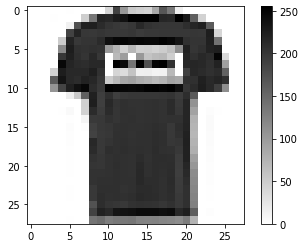

In [8]:
# plotting one image from the train set
plt.figure
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

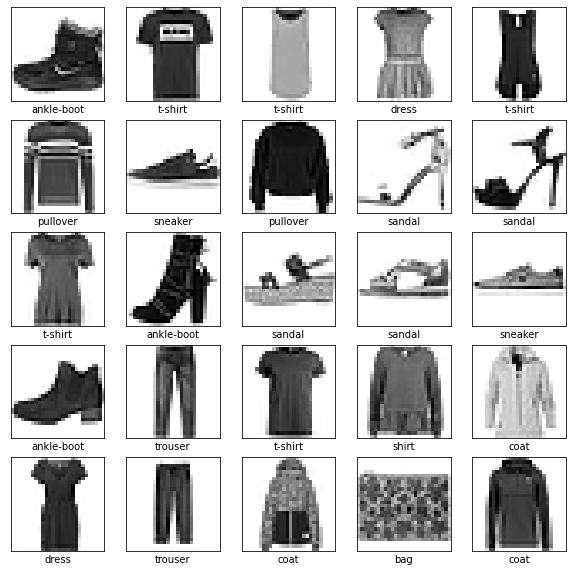

In [9]:
# plotting 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)    # print 5 images per row
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


## Processing Data

- Normalizing the images
- Reshaping images to 28x28x1

In [10]:
# normalizing the values to be between 0 and 1;
train_images = (train_images / 255.0)
test_images = (test_images / 255.0)

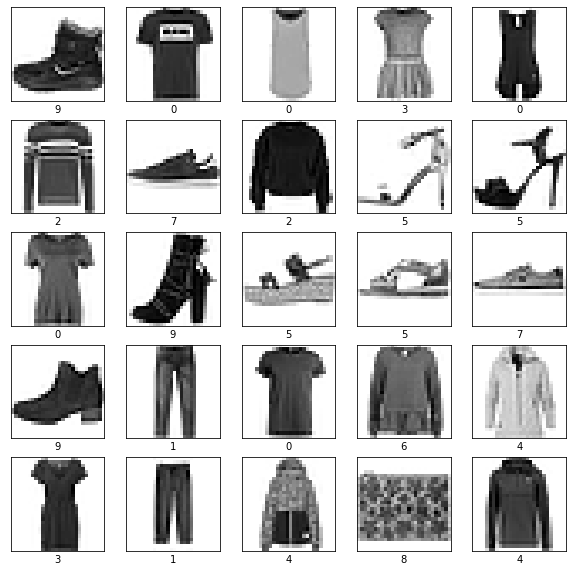

In [11]:
# plotting images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)    # print 5 images per row
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [12]:
# defining the image shape (horizontal pixels x vertical pixels x grey scale)
iShape = (28,28, 1)

In [13]:
# the first convolution expects a single tensor containing everything, 
# so instead of 60,000 28x28x1 items in an array (60000, 28, 28), 
# it wants a single 4D array/tensor that is 60000x28x28x1, otherwise you will get an error.

# reshaping the images into a single tensor
train_images = train_images.reshape(train_rows, 28, 28, 1)
test_images = test_images.reshape(test_rows, 28, 28, 1)

## Modelling

- Creating a keras sequential model
- Compiling the model
- Printing model summary


In [14]:
# creating a Convolution Neural Network
model = keras.models.Sequential()
# adding layers
model.add(layers.Conv2D(32, activation = 'relu', input_shape = iShape, kernel_size=(3, 3)))
# (3,3) - filter size, 64 number of filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  
# (2,2) - pooling size
model.add(layers.MaxPooling2D(pool_size=(2, 2)))          

In [15]:
# randomly dropping neurons and their connections to avoid over fitting on training set
# removing 25% of neurons
model.add(layers.Dropout(rate = 0.25))

In [16]:
# converting previous layer into 1 dimensional array
# flattening the data into a 1D array
model.add(layers.Flatten())

In [17]:
# adding a dense hidden layer
model.add(layers.Dense(128, activation='relu'))
# adding another dropout layer before 
model.add(layers.Dropout(0.5))
# adding a final dense layer which classifies the data into classes
model.add(layers.Dense(10, activation='softmax')) 

In [18]:
# compiling the model with chosen parameters
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# printing model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

# Trainning the Convolutional Neural Network (CNN)

- Trainning the model 
- Displaying accuracy and loss information

In [20]:
# measuring time required to train
start = timeit.default_timer()

In [21]:
# training the model
batches = 128
epochs = 10
history = model.fit(train_images, 
                    train_labels, 
                    validation_split = 0.2, 
                    batch_size = batches, 
                    epochs = epochs)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 50s 1ms/sample - loss: 0.5634 - accuracy: 0.8008 - val_loss: 0.3421 - val_accuracy: 0.8771
Epoch 2/10
48000/48000 [==============================] - 47s 979us/sample - loss: 0.3633 - accuracy: 0.8716 - val_loss: 0.2940 - val_accuracy: 0.8927
Epoch 3/10
48000/48000 [==============================] - 48s 994us/sample - loss: 0.3084 - accuracy: 0.8912 - val_loss: 0.2594 - val_accuracy: 0.9056
Epoch 4/10
48000/48000 [==============================] - 47s 985us/sample - loss: 0.2783 - accuracy: 0.9010 - val_loss: 0.2426 - val_accuracy: 0.9089
Epoch 5/10
48000/48000 [==============================] - 46s 967us/sample - loss: 0.2509 - accuracy: 0.9090 - val_loss: 0.2285 - val_accuracy: 0.9144
Epoch 6/10
48000/48000 [==============================] - 46s 952us/sample - loss: 0.2291 - accuracy: 0.9163 - val_loss: 0.2203 - val_accuracy: 0.9205
Epoch 7/10
48000/48000 [======================

In [22]:
# printing training time
stop = timeit.default_timer()
exec_time = stop - start
final_exec_time = time.strftime('%M:%S', time.gmtime(exec_time)) 
print('It took {} mins'.format(final_exec_time), 'to train the model with', epochs, 'epochs.')

It took 07:47 mins to train the model with 10 epochs.


In [23]:
# getting metrics names in a list
metrics_names = model.metrics_names
metrics_names

['loss', 'accuracy']

In [24]:
# creating function to plot the accuracy and loss
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.title('Training and Validation')
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

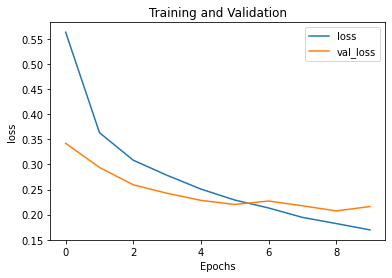

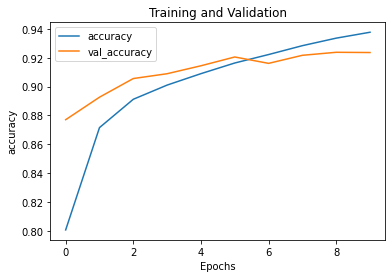

In [25]:
for name in metrics_names:
    plot_graphs(history, name)

## Evaluating the model

In [26]:
# using the test set of images to evaluate the model on a set of unseen images
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('The test accuracy is', '{0:,.2f}'.format((test_acc*100)), '%.')

10000/10000 [==============================] - 2s 166us/sample - loss: 0.2312 - accuracy: 0.9178
The test accuracy is 91.78 %.


In [27]:
# getting predictions
# predict_classes() returns a class prediction 
# predict() returns probabilities
predictions = model.predict(test_images)
predictions[:3]

array([[4.0635377e-12, 1.8047875e-12, 2.8969652e-12, 4.1459159e-11,
        3.6612813e-13, 1.9823626e-06, 1.9552828e-11, 1.0823369e-05,
        1.8820538e-10, 9.9998724e-01],
       [8.1558809e-08, 1.2642665e-17, 9.9999988e-01, 2.2996710e-10,
        3.2432430e-09, 1.1602574e-18, 2.3725280e-08, 1.0345636e-18,
        5.1439051e-13, 4.0856115e-21],
       [2.6351092e-13, 1.0000000e+00, 1.6117763e-15, 1.7779330e-14,
        7.4512150e-15, 1.0571371e-16, 2.1336447e-15, 3.8414421e-23,
        8.8540660e-13, 3.6495318e-20]], dtype=float32)

In [28]:
# checking some of the test_images labels
test_labels[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [29]:
# checking prediction for a selected test_image
predictions[9]

array([1.8749243e-12, 2.1671690e-16, 4.4207216e-12, 1.9574311e-11,
       4.7731113e-14, 2.7799354e-09, 6.3329192e-13, 1.0000000e+00,
       6.8191910e-11, 1.0742841e-09], dtype=float32)

In [30]:
# sortting probabilities 
np.argsort(predictions[9])

array([1, 4, 6, 0, 2, 3, 8, 9, 5, 7])

In [31]:
# reversing the order to view the class probabilities from best to work
np.argsort(predictions[9])[::-1]

array([7, 5, 9, 8, 3, 2, 0, 6, 4, 1])

In [32]:
# printing the class number with the highest probability
np.argmax(predictions[9])

7

In [33]:
# showing the class name with the highest probability; the class name with the index position of the prediction
class_selection = np.argmax(predictions[9])
class_names[class_selection]

'sneaker'

## Making prediction on a single new image

In [34]:
# making a prediction on a single (new) image
image = test_images[0]
image.shape

(28, 28, 1)

In [35]:
# adding image to a batch of one as requested by keras
image = (np.expand_dims(image,axis=0))
image.shape

(1, 28, 28, 1)

In [36]:
# using the trained model to predict the class that the image belongs to
single_prediction = model.predict(image)
print(single_prediction[0])

[4.0635533e-12 1.8047945e-12 2.8969763e-12 4.1459395e-11 3.6612952e-13
 1.9823665e-06 1.9552866e-11 1.0823369e-05 1.8820573e-10 9.9998724e-01]


In [37]:
# displaying the prediction
classification = np.argmax(single_prediction[0])
class_name = class_names[classification]                      
print('The predicted class label is {}: {}'.format(classification, class_name))

The predicted class label is 9: ankle-boot


In [38]:
# displaying the correct label
print('The true class label is {}: {}'.format(test_labels[0], class_names[test_labels[0]]))

The true class label is 9: ankle-boot
